In [8]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [9]:
PATH = 'data'
LABELS=f'{PATH}/label'
TIME_1=f'{PATH}/time1'
TIME_2=f'{PATH}/time2'

In [31]:
from PIL import Image
img = Image.open(f'{TIME_1}/00360.png')
img2 = Image.open(f'{TIME_1}/00360.png')
plt.imshow(img)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'data/time1/00360.png'

In [10]:
import torchvision

data_path = 'data/imgs'
train_dataset = torchvision.datasets.ImageFolder(
    root=data_path,
    transform=torchvision.transforms.ToTensor()
)
train_loader = torch.utils.data.DataLoader(
    train_dataset,
    batch_size=64,
    num_workers=1,
    shuffle=True
)


In [35]:
!ls
import os 
!pwd

content    figures  jupyter.ipynb  __pycache__	synthetic.py
cutmix.py  fmix.py  LICENSE	   README.md
data	   geo.yml  notebooks	   scripts
/home/s2254242/PHD/ATI/cnn-land-cover


In [39]:
it = iter(train_loader)
batch, _ = next(it)

In [12]:
import cutmix
from torch.distributions import Beta
def mix_batch_cutmix(batch):
    
    x1 = batch
    original_x1 = x1.clone() # !!!! copy properly
    permutation = torch.randperm(x1.shape[0])
    x2 = batch[permutation]
    cutter = cutmix.BatchCutout(1, (length * x1.size(-1)).round().item(), (length * x1.size(-2)).round().item())
    synthetic_mask = cutter(x1)
    erase_locations = synthetic_mask == 0
    x1[erase_locations] = x1[permutation][erase_locations]
    return x1

lam = Beta(torch.tensor([float(0.1)]), torch.tensor([float(0.1)])).sample()
length = (1 - lam).sqrt()

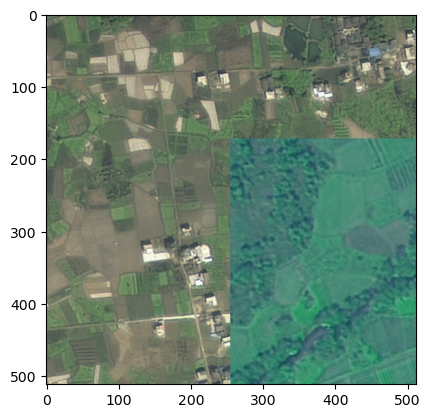

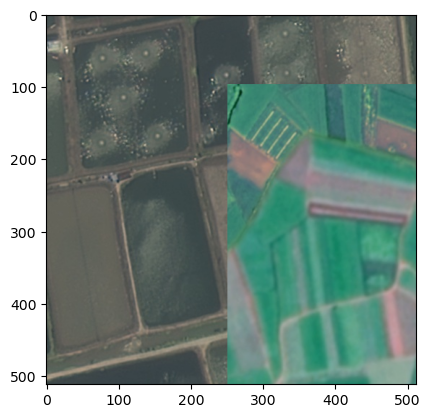

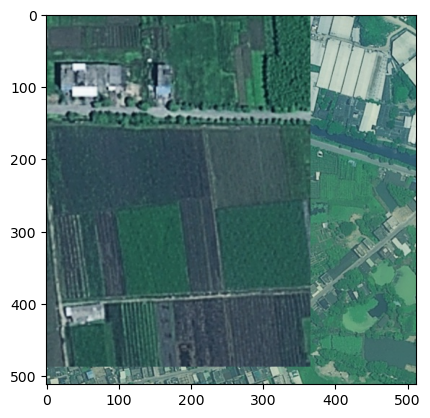

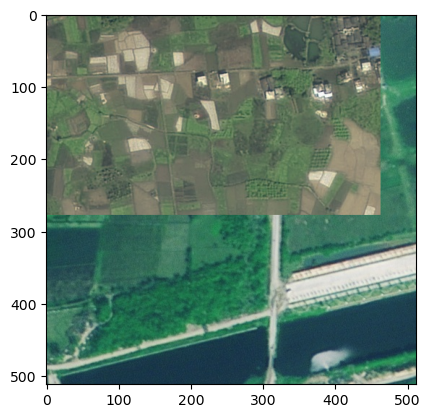

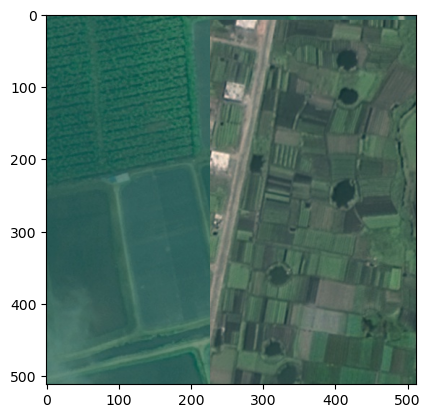

In [30]:
mixed_batch = mix_batch_cutmix(batch)
for i in range(0, 5): 
    plt.imshow(mixed_batch[i].permute(1,2,0))
    plt.show()

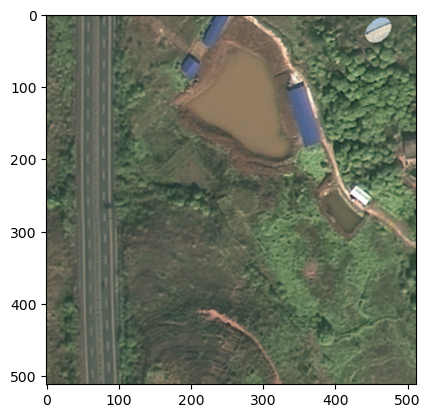

In [40]:
from fmix import sample_and_apply

fmixed, _, _ = sample_and_apply(batch, 0.7, 3., batch[0].shape[-2:])
plt.imshow(fmixed[3].permute(1,2,0))
plt.show()

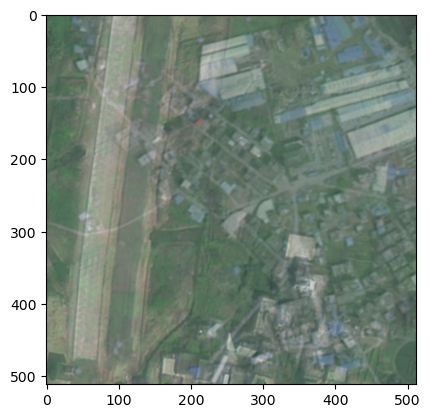

In [47]:
def mixup(x):
    lam = 0.5 #Beta(torch.tensor([float(0.1)]), torch.tensor([float(0.1)])).sample()
    permutation = torch.randperm(x.shape[0])

    return x*lam+x[permutation]*(1-lam), permutation

mixuped, permutation = mixup(batch)
plt.imshow(mixuped[0].permute(1,2,0))
plt.show()